In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
ds_path = '/Users/nivedha/Downloads/Leaves'


In [3]:
test_img_path = ds_path + '/2546.jpg'
test_img_path


'/Users/nivedha/Downloads/Leaves/2546.jpg'

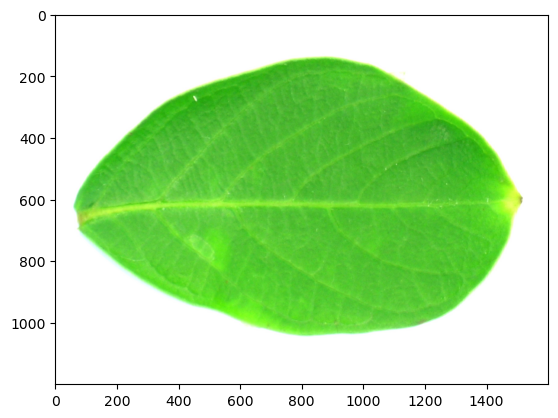

In [4]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


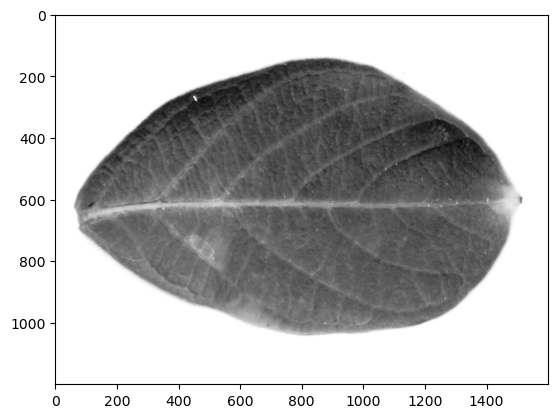

In [5]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [6]:
gs.shape

(1200, 1600)

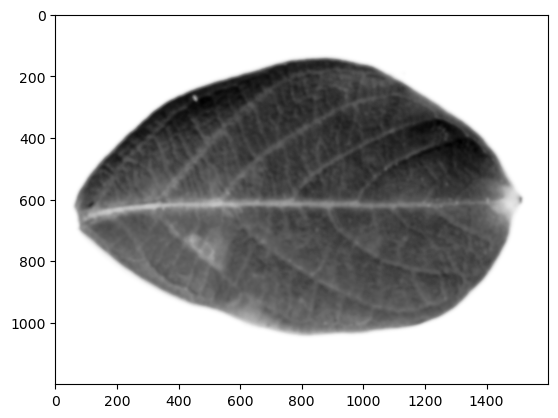

In [7]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')


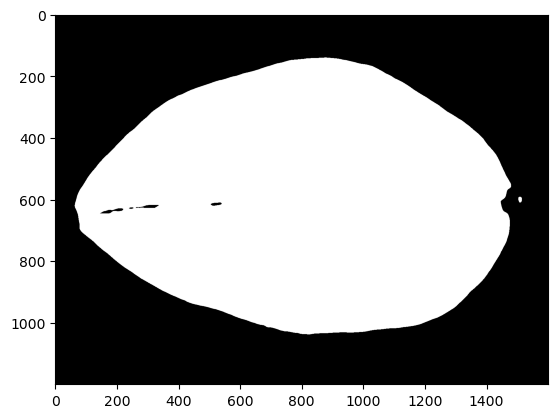

In [8]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')


In [9]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)


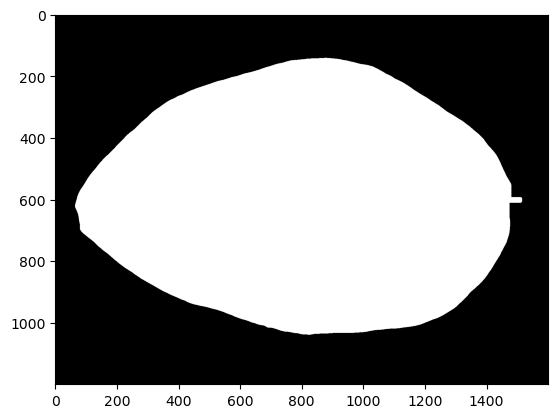

In [10]:
plt.imshow(closing,cmap='Greys_r')


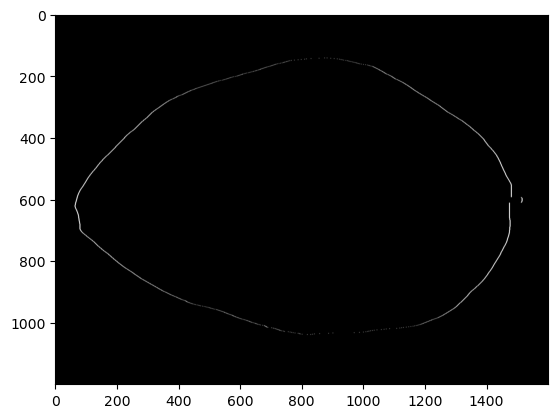

In [11]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')


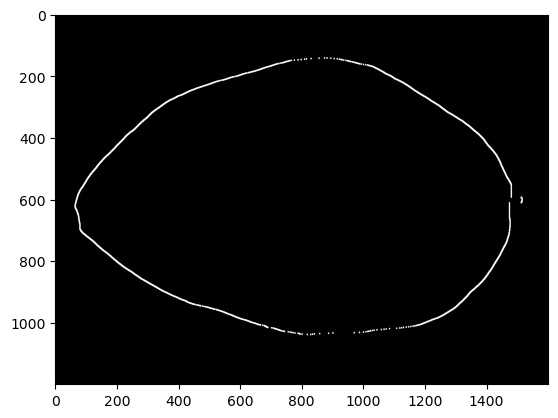

In [12]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')


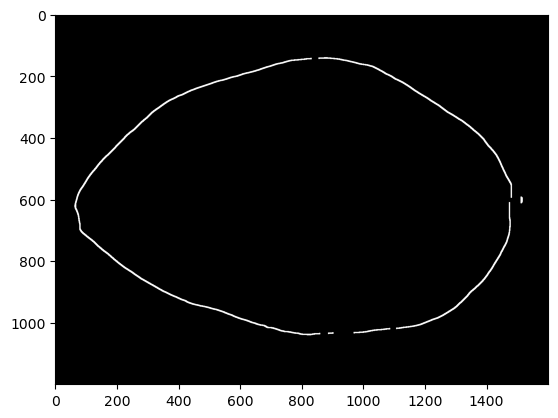

In [13]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')


     

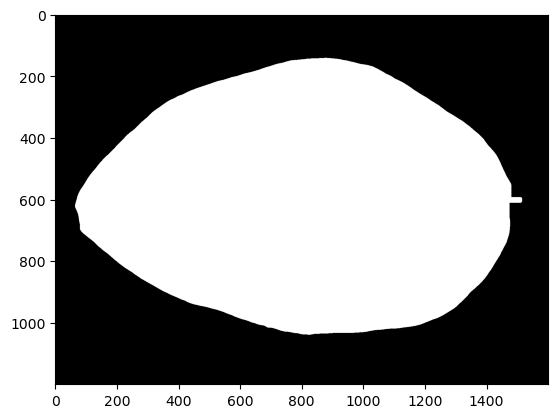

In [14]:
plt.imshow(closing,cmap="Greys_r")


In [15]:
 contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [16]:
len(contours)

1

In [17]:
cnt = contours[0]
len(cnt)


1584

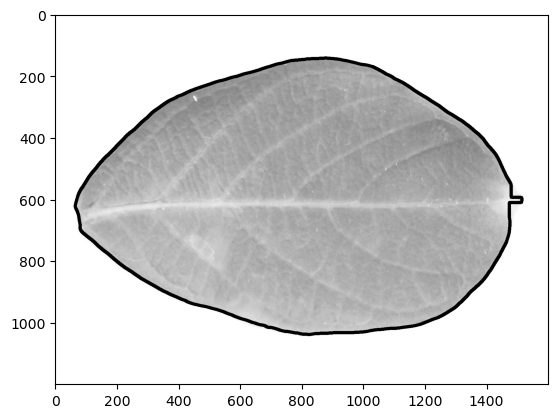

In [18]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")


In [19]:
M = cv2.moments(cnt)
M

{'m00': 935247.5,
 'm10': 756581477.6666666,
 'm01': 565084685.3333333,
 'm20': 723289661044.75,
 'm11': 460385663606.625,
 'm02': 385636777043.0833,
 'm30': 761929179121276.5,
 'm21': 443601913788318.6,
 'm12': 317109999618216.2,
 'm03': 285945100266709.94,
 'mu20': 111242548009.66907,
 'mu11': 3252545115.213257,
 'mu02': 44207688381.23468,
 'mu30': -3168469618100.5,
 'mu21': 1321617615148.461,
 'mu12': 1213331106627.2031,
 'mu03': -481339969483.8125,
 'nu20': 0.12717970576430193,
 'nu11': 0.0037185208190483455,
 'nu02': 0.050541100518092144,
 'nu30': -0.0037457014335213947,
 'nu21': 0.001562389920783421,
 'nu12': 0.0014343757754427236,
 'nu03': -0.0005690304882227447}

In [20]:
area = cv2.contourArea(cnt)
area

935247.5

In [21]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3879.6563143730164

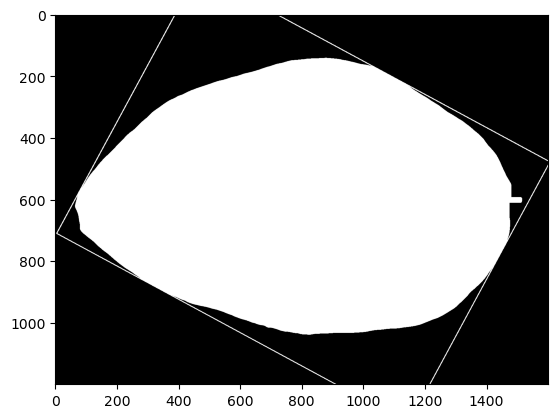

In [22]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")


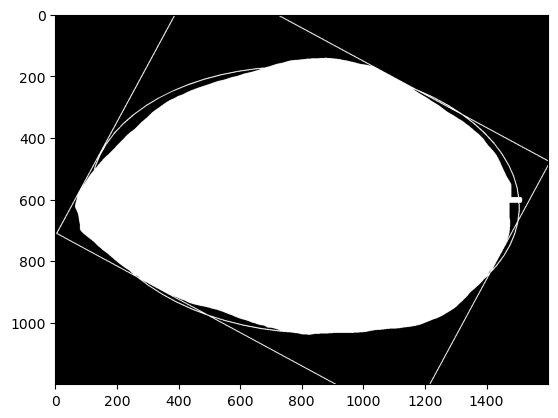

In [23]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")


In [24]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio


1.6158129175946547

In [25]:
rectangularity = w*h/area
rectangularity


1.3932119572626498

In [26]:
circularity = ((perimeter)**2)/area
circularity


16.09385014945714

In [27]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter


1091.2351264116726

In [28]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

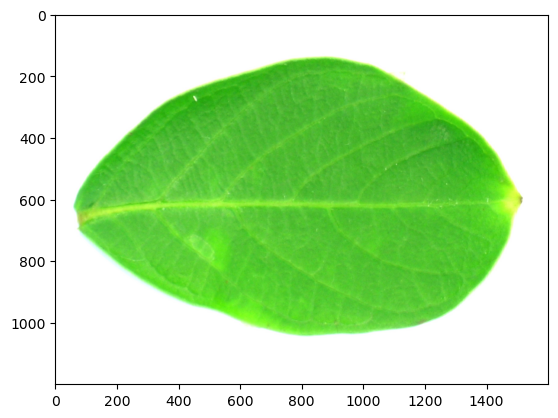

In [29]:
plt.imshow(img,cmap="Greys_r")


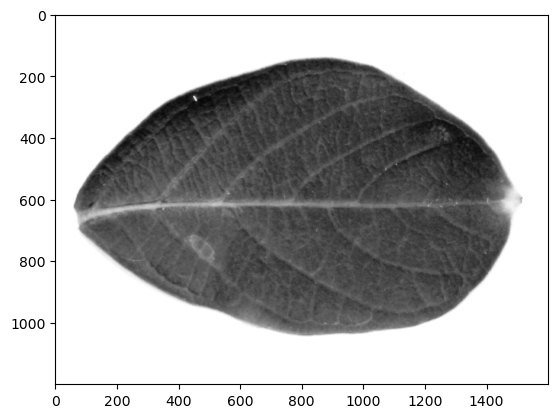

In [30]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")


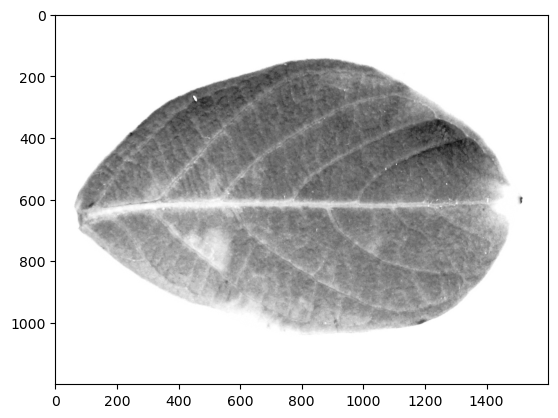

In [31]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")



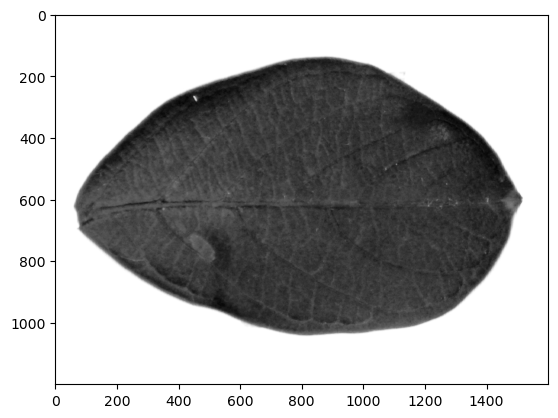

In [32]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")


In [33]:
np.mean(blue_channel)

153.04465729166665

In [34]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0


In [35]:
red_mean = np.mean(red_channel)
red_mean


46.30409322916667

In [36]:
green_mean = np.mean(green_channel)
green_mean

99.32064895833334

In [37]:
blue_mean = np.mean(blue_channel)
blue_mean


27.54534479166667

In [38]:
red_var = np.std(red_channel)
red_var


50.659233268268196